<a href="https://colab.research.google.com/github/gjm112/DSCI401/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
#Dense model 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()


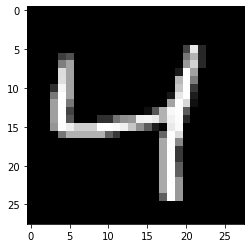

In [25]:
import matplotlib.pyplot as plt
#%matplotlib inline
sample = 2
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [8]:
num_train  = X_train.shape[0]
num_test   = X_test.shape[0]

img_height = X_train.shape[1]
img_width  = X_train.shape[2]
X_train = X_train.reshape((num_train, img_width * img_height))
X_test  = X_test.reshape((num_test, img_width * img_height))

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
X_train.shape

(60000, 784)

In [10]:
model = keras.Sequential()
model.add(layers.Dense(32, input_dim = 28 * 28, activation= 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs = 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 2.4160 - accuracy: 0.6377
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.5700 - accuracy: 0.8546
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.4101 - accuracy: 0.8944
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3460 - accuracy: 0.9108
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3102 - accuracy: 0.9193
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2918 - accuracy: 0.9255
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2793 - accuracy: 0.9290
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2610 - accuracy: 0.9334
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2500 - accuracy: 0.9353
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2433 - accuracy: 0.9367

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2663290500640869
Test accuracy: 0.9373999834060669


#CNN

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])